# Prime Time for Julia

In [1]:
# Packages
using BenchmarkTools
using Plots

### Check if Integer is a Prime

In [2]:
function isprime(prime::Int64)::Bool
    if prime == 1
        return false
    else
        remainders = BitArray(falses(prime))
        for i in 1:prime
            if rem(prime, i) == 0
                remainders[i] = true
            end
        end
        if sum(remainders) == 2
            return true
        else
            return false
        end
    end
end


isprime (generic function with 1 method)

In [3]:
# Demo
isprime(1)

false

In [4]:
# Demo
isprime(2)

true

In [5]:
# Demo
isprime(11)

true

In [6]:
# Demo
isprime(100)

false

In [7]:
# Demo
isprime(1212121)

true

In [8]:
# Benchmark
@benchmark isprime(10^9)

BenchmarkTools.Trial: 8 samples with 1 evaluation.
 Range (min … max):  652.954 ms … 724.631 ms  ┊ GC (min … max): 0.44% … 7.28%
 Time  (median):     658.760 ms               ┊ GC (median):    0.55%
 Time  (mean ± σ):   673.841 ms ±  31.296 ms  ┊ GC (mean ± σ):  2.67% ± 3.86%

  ▁▁▁▁  █                                                     █  
  ████▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  653 ms           Histogram: frequency by time          725 ms <

 Memory estimate: 238.42 MiB, allocs estimate: 6.

### Performance Prime Generators

The functions `PrimesX(n)` return all prime numbers in the range 1 to `n` (not `n` prime numbers).

In [9]:
# Julia without Type Declaration
function Primes1(n)
    D = Dict()
    P = []
    q = 2

    while q <= n
        if !(q in keys(D))
            D[q * q] = [q]
            push!(P, q)
        else
            for p in D[q]
                get!(D, p + q, [])
                push!(D[p + q], p)
                delete!(D, q)
            end
        end
        q += 1
    end

    return P
end

Primes1 (generic function with 1 method)

In [10]:
# Demo
Primes1(11)

5-element Vector{Any}:
  2
  3
  5
  7
 11

In [11]:
# Julia with Type Declaration
function Primes2(n::Int64)::Vector{Int64}
    D = Dict{Int64, Vector{Int64}}()
    P = []
    q = 2

    while q <= n
        if !(q in keys(D))
            D[q * q] = [q]
            push!(P, q)
        else
            for p in D[q]
                get!(D, p + q, [])
                push!(D[p + q], p)
                delete!(D, q)
            end
        end
        q += 1
    end

    return P
end

Primes2 (generic function with 1 method)

In [12]:
# Demo
Primes2(11)

5-element Vector{Int64}:
  2
  3
  5
  7
 11

In [13]:
# Julia with HashKey
function Primes3(n::Int64)::Vector{Int64}
    D = Dict{Int64, Vector{Int64}}()
    P = []
    q = 2

    while q <= n
        if !(haskey(D, q))
            D[q * q] = [q]
            push!(P, q)
        else
            for p in D[q]
                if haskey(D, p + q)
                    push!(D[p + q], p)
                else
                    D[p + q] = [p]
                end
                delete!(D, q)
            end
        end
        q += 1
    end

    return P
end

Primes3 (generic function with 1 method)

In [14]:
# Demo
Primes3(11)

5-element Vector{Int64}:
  2
  3
  5
  7
 11

In [15]:
# Julia with BitArray
function Primes4(n::Int64)::Vector{Int64}
    A = BitArray(trues(n)) # array with results
    A[1] = false # 1 is not a prime
    candidate = 2
    while candidate <= sqrt(n)
        for i in candidate:(n ÷ candidate)
            A[i * candidate] = false
        end
        candidate += 1
        while candidate <= n && A[candidate] == false
            candidate += 1
        end
    end
    findall(x -> x != false, A)
end

Primes4 (generic function with 1 method)

In [16]:
# Demo
Primes4(11)

5-element Vector{Int64}:
  2
  3
  5
  7
 11

In [17]:
# Check for equal results
Primes1(100) == Primes2(100) == Primes3(100) == Primes4(100)

true

In [18]:
# Benchmarking
benchmarks = Dict()
n = 1_000_000

benchmark1 = @benchmark Primes1($n)
benchmark2 = @benchmark Primes2($n)
benchmark3 = @benchmark Primes3($n)
benchmark4 = @benchmark Primes4($n);

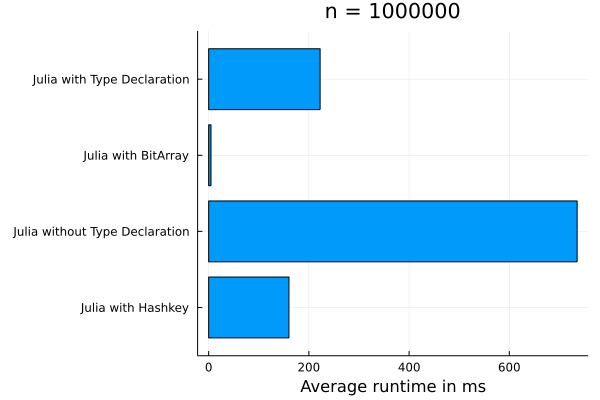

In [19]:
# Duration
benchmarks["Julia without Type Declaration"] = mean(benchmark1.times) / 10^6
benchmarks["Julia with Type Declaration"] = mean(benchmark2.times) / 10^6
benchmarks["Julia with Hashkey"] = mean(benchmark3.times) / 10^6
benchmarks["Julia with BitArray"] = mean(benchmark4.times) / 10^6

plot(
    benchmarks, 
    seriestype = :bar, 
    orientation = :horizontal, 
    label = false, 
    xlab = "Average runtime in ms", 
    title = "n = $n", 
    )

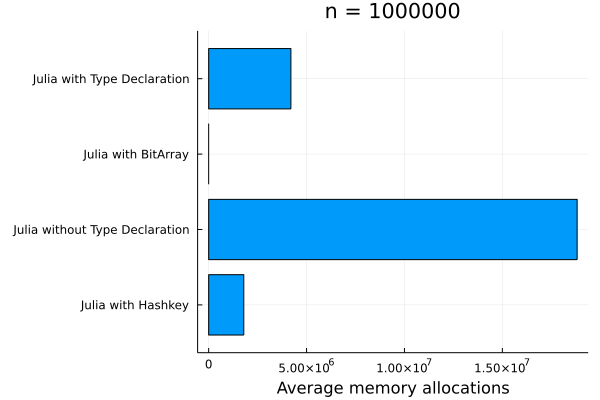

In [20]:
# Memory allocation
benchmarks["Julia without Type Declaration"] = mean(benchmark1.allocs)
benchmarks["Julia with Type Declaration"] = mean(benchmark2.allocs)
benchmarks["Julia with Hashkey"] = mean(benchmark3.allocs)
benchmarks["Julia with BitArray"] = mean(benchmark4.allocs)

plot(
    benchmarks, 
    seriestype = :bar, 
    orientation = :horizontal, 
    label = false, 
    xlab = "Average memory allocations", 
    title = "n = $n", 
    )

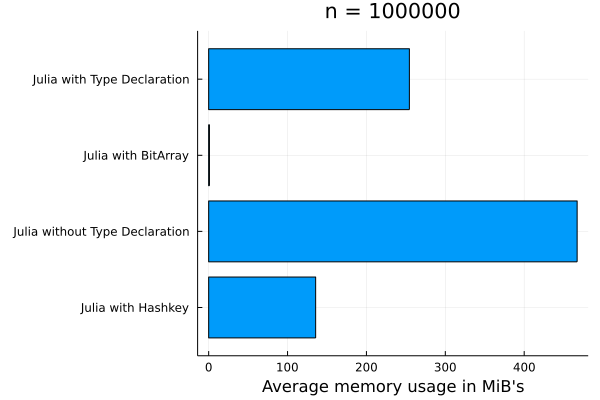

In [21]:
# Memory usage
benchmarks["Julia without Type Declaration"] = mean(benchmark1.memory) / 1024^2
benchmarks["Julia with Type Declaration"] = mean(benchmark2.memory) / 1024^2
benchmarks["Julia with Hashkey"] = mean(benchmark3.memory) / 1024^2
benchmarks["Julia with BitArray"] = mean(benchmark4.memory) / 1024^2

plot(
    benchmarks, 
    seriestype = :bar, 
    orientation = :horizontal, 
    label = false, 
    xlab = "Average memory usage in MiB's", 
    title = "n = $n", 
    )